In [ ]:
import pandas as pd

# Veri setini okuyoruz
df = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Dataset shape (rows, columns)
# Veri setinin boyutu (satır, sütun)
print("Shape of dataset:", df.shape)

# Data types and non-null values
# Veri tipleri ve null olmayan değer sayıları
print("\n--- Data Types and Null Status ---")
print(df.info())

# Statistical summary for numeric columns
# Sayısal sütunlar için istatistiksel özet
print("\n--- Statistical Summary (Numeric Columns) ---")
print(df.describe())

# Checking missing values per column
# Her sütundaki eksik değerleri kontrol etme
print("\n--- Missing Values per Column ---")
print(df.isnull().sum())


Shape of dataset: (1470, 35)

--- Data Types and Null Status ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvemen

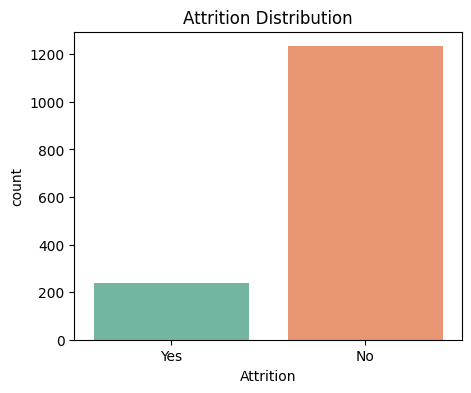

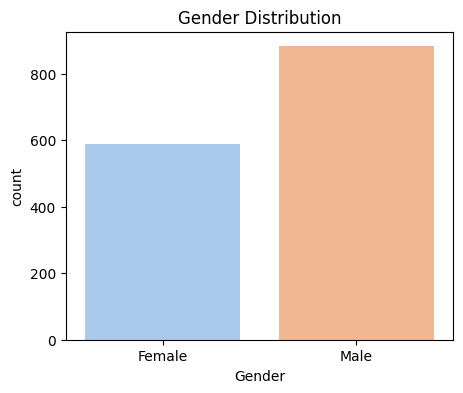

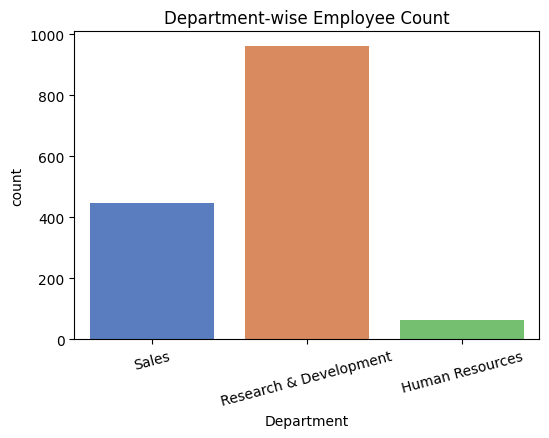

In [5]:
# Since the dataset appears to be clean (no missing values or incorrect data types),
#we can skip data cleaning and move directly to the initial visual exploration.
# Veri seti temiz göründüğü (eksik değer veya yanlış veri tipi bulunmadığı) için veri temizleme adımını atlayarak
#doğrudan görsel keşif aşamasına geçiyoruz.

import matplotlib.pyplot as plt
import seaborn as sns

# Attrition distribution
# İşten ayrılan ve kalmaya devam eden çalışanların oranı
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Attrition', hue='Attrition', palette='Set2', legend=False)
plt.title("Attrition Distribution")
plt.show()

# Gender distribution
# Cinsiyet dağılımı
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.title("Gender Distribution")
plt.show()

# Department distribution
# Departman bazında çalışan sayısı
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Department', hue='Department', palette='muted', legend=False)
plt.title("Department-wise Employee Count")
plt.xticks(rotation=15)
plt.show()

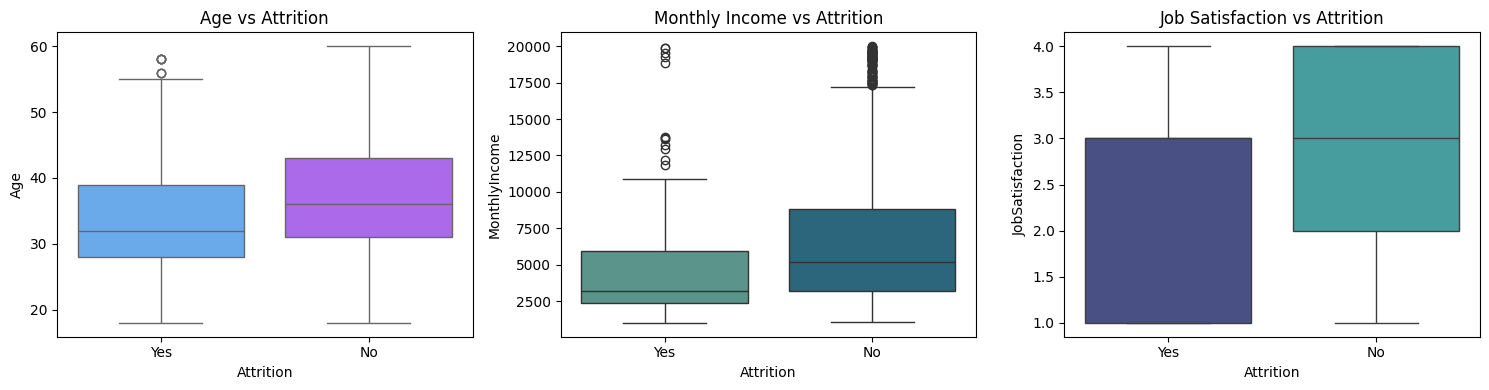

In [14]:
plt.figure(figsize=(15,4))

# Age vs Attrition
# Yaş dağılımı
plt.subplot(1,3,1)
sns.boxplot(data=df, x='Attrition', y='Age', hue='Attrition', palette='cool', legend=False)
plt.title("Age vs Attrition")

# MonthlyIncome vs Attrition
# Aylık gelir dağılımı
plt.subplot(1,3,2)
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', hue='Attrition', palette='crest', legend=False)
plt.title("Monthly Income vs Attrition")

# JobSatisfaction vs Attrition
# İş tatmini dağılımı
plt.subplot(1,3,3)
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', hue='Attrition', palette='mako', legend=False)
plt.title("Job Satisfaction vs Attrition")

plt.tight_layout()
plt.show()


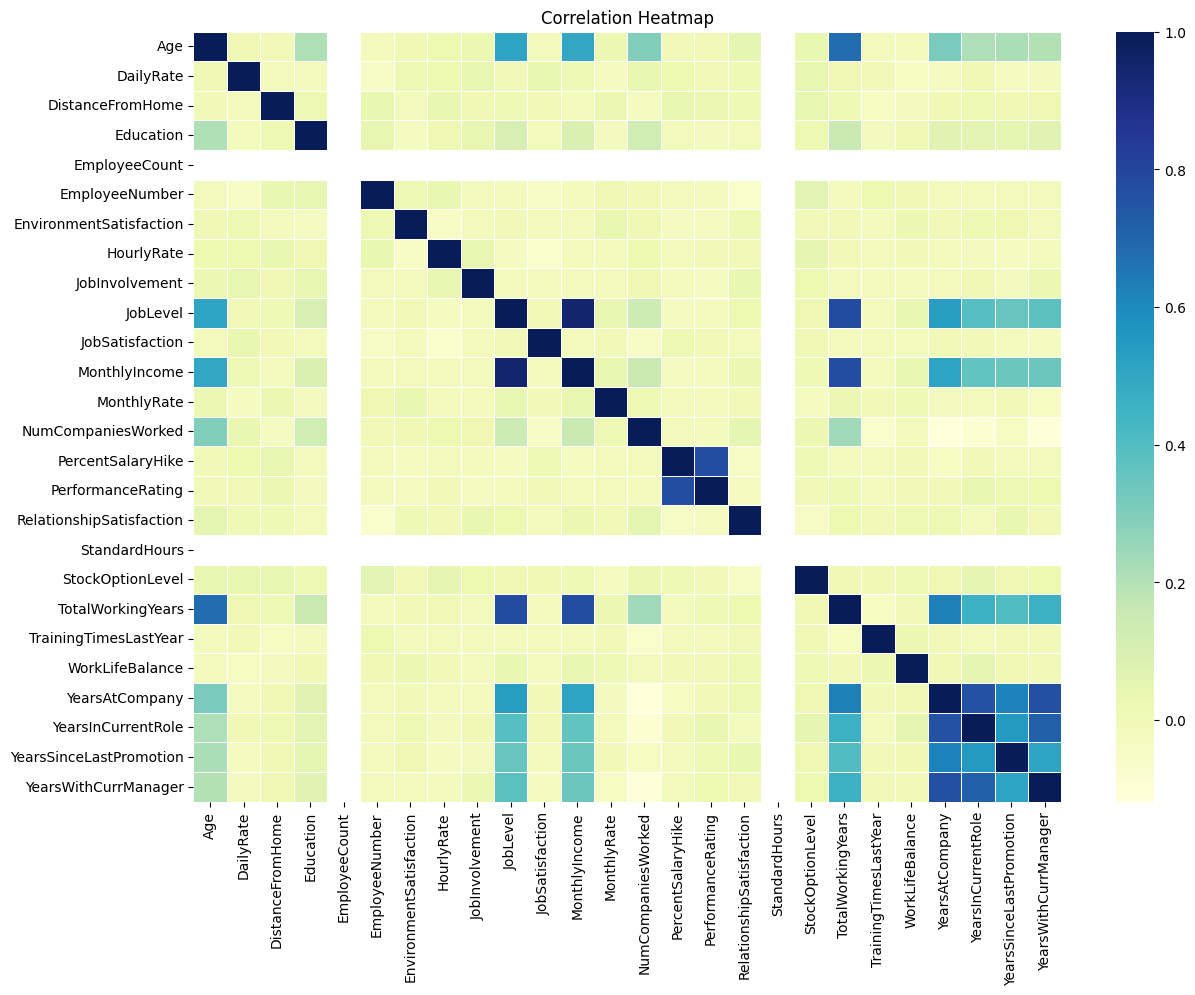

In [15]:
# Selecting only numeric columns for correlation
# Korelasyon için sadece sayısal sütunları seçiyoruz
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix
# Korelasyon matrisini hesaplıyoruz
corr = numeric_df.corr()

# Plotting the heatmap
# Korelasyon ısı haritasını çiziyoruz
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Making a copy to avoid altering the original dataset
# Orijinal veri setini bozmamak için bir kopya oluşturuyoruz
encoded_df = df.copy()

# Initializing label encoder
# Label encoder nesnesini tanımlıyoruz
le = LabelEncoder()

# Encoding all object (categorical) columns
# Tüm kategorik (object tipindeki) sütunları encode ediyoruz
for col in encoded_df.select_dtypes(include=['object']).columns:
    encoded_df[col] = le.fit_transform(encoded_df[col])

# Displaying first 5 rows of the encoded dataframe
# Encode edilmiş veri setinin ilk 5 satırını gösteriyoruz
encoded_df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Splitting features and target
# Bağımsız değişkenler (X) ve hedef değişken (y)
X = encoded_df.drop('Attrition', axis=1)
y = encoded_df['Attrition']

# Scaling numeric columns
# Sayısal sütunları ölçekliyoruz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
# Eğitim ve test verisine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training with scaled data
# Ölçeklenmiş veride modeli eğitme
model = LogisticRegression(max_iter=3000, solver='lbfgs')
model.fit(X_train, y_train)

# Predictions and evaluation
# Tahmin ve değerlendirme
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.891156462585034

Confusion Matrix:
 [[249   6]
 [ 26  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294



C:\Users\harun\AppData\Local\Temp\ipykernel_10540\1476696236.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')


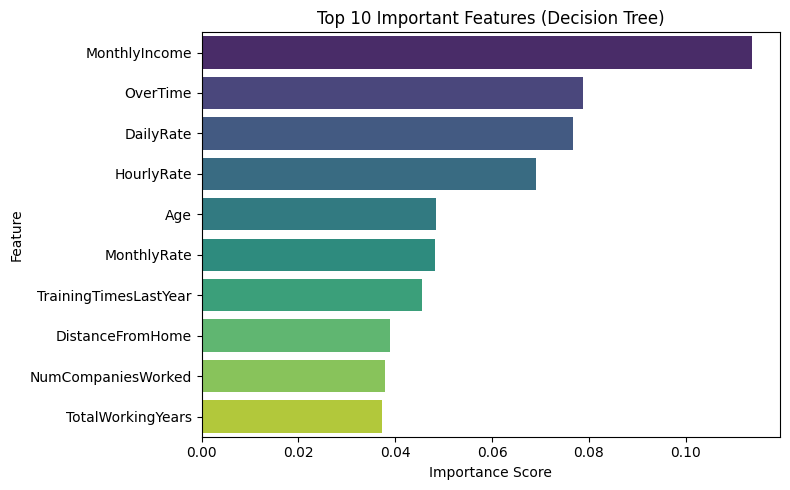

,Feature,Importance
17,MonthlyIncome,0.113815
21,OverTime,0.078718
2,DailyRate,0.076716
11,HourlyRate,0.069154
0,Age,0.048526
18,MonthlyRate,0.048173
28,TrainingTimesLastYear,0.045516
4,DistanceFromHome,0.038838
19,NumCompaniesWorked,0.037784
27,TotalWorkingYears,0.037326


In [20]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model training
# Modeli oluşturup eğitiyoruz
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Feature importance extraction
# Özellik önem skorlarını alıyoruz
importances = pd.DataFrame({
    'Feature': df.drop('Attrition', axis=1).columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualizing top 10 features
# En önemli 10 özelliği görselleştiriyoruz
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')
plt.title("Top 10 Important Features (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Displaying top 10 features in table format
# En önemli 10 özelliği tablo olarak gösteriyoruz
importances.head(10)
